### MACHINE LEARNING MODELS FOR THE DIABETES DATASET K=2

First of all, we will perform data curation and preparation. Next, we will apply the following Machine Learning models:

- Linear Regression
- k-Nearest Neighbors(k-NN)
- Support Vector Machines (SVM)
- Classification Trees
- Random Forest
- Ada Boosting
- Gradient Boosting
- Neural Networks(NN)

**Import the necessary libraries:**

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("ignore")
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, make_scorer, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
#import shap
import matplotlib.pyplot as plt
import seaborn as sns

2023-07-03 01:38:47.815185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 01:38:47.855736: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


**Set seeds for the different libraries that need it. To ensure reproducibility of the results**

In [3]:
random_seed = 14
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

**We load the dataset and remove the anonymized data with the following function:**

In [4]:
file_name = "/home/carmen/Escritorio/TFM/ml_anonymization/datasets/diabetes_dataset/csv/diabetes_k_3-anonymized.csv"
df = pd.read_csv(file_name, sep=",")

q_i=["Age","Gender","Polyuria","Polydipsia","sudden weight loss","weakness","Polyphagia","Genital thrush","visual blurring","Itching","Irritability","delayed healing","partial paresis","muscle stiffness","Alopecia","Obesity"]
a_s = ["class"]
def delete_rows(file_name, quasi_ident, fillna=True):
    """Delete the rows of the given file in which all QIs are set to *."""
    df = pd.read_csv(file_name, sep=",")
    df_qi = df[quasi_ident]
    row_mask = (df_qi == "*").all(axis=1)
    df_new = df[~row_mask].reset_index(drop=True)
    print(df_new)
    return df_new



new_dataset = delete_rows(file_name,q_i)

          Age  Gender Polyuria Polydipsia sudden weight loss weakness  \
0    [35, 40[    Male       No         No                 No       No   
1    [70, 75[    Male      Yes         No                 No       No   
2    [35, 40[  Female      Yes        Yes                Yes      Yes   
3    [40, 45[    Male       No         No                 No       No   
4    [50, 55[    Male      Yes        Yes                Yes      Yes   
..        ...     ...      ...        ...                ...      ...   
302  [40, 45[    Male       No         No                Yes       No   
303  [55, 60[    Male       No         No                Yes      Yes   
304  [55, 60[  Female      Yes        Yes                Yes       No   
305  [65, 70[  Female      Yes        Yes                 No      Yes   
306  [60, 65[    Male       No         No                 No      Yes   

    Polyphagia Genital thrush visual blurring Itching Irritability  \
0           No             No              No      No

**We explore the new dataset**

In [5]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

        Age  Gender Polyuria Polydipsia sudden weight loss weakness  \
0  [35, 40[    Male       No         No                 No       No   
1         *       *        *          *                  *        *   
2  [70, 75[    Male      Yes         No                 No       No   
3  [35, 40[  Female      Yes        Yes                Yes      Yes   
4         *       *        *          *                  *        *   

  Polyphagia Genital thrush visual blurring Itching Irritability  \
0         No             No              No      No           No   
1          *              *               *       *            *   
2        Yes             No             Yes     Yes           No   
3        Yes             No             Yes     Yes          Yes   
4          *              *               *       *            *   

  delayed healing partial paresis muscle stiffness Alopecia Obesity     class  
0              No              No               No       No      No  Negative  
1   

**Check if there is any data that is null to eliminate it, if it exists:**

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

**Eliminate duplicate data if any**

In [7]:
df.drop_duplicates(inplace=True)

**Convert categorical variables to factors:**

In [8]:
df["Age"] = df["Age"].astype("category").cat.codes
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Polyuria"] = df["Polyuria"].astype("category").cat.codes
df["Polydipsia"] = df["Polydipsia"].astype("category").cat.codes
df["sudden weight loss"] = df["sudden weight loss"].astype("category").cat.codes  
df["weakness"] = df["weakness"].astype("category").cat.codes
df["Polyphagia"] = df["Polyphagia"].astype("category").cat.codes
df["Genital thrush"] = df["Genital thrush"].astype("category").cat.codes


df["visual blurring"] = df["visual blurring"].astype("category").cat.codes
df["Itching"] = df["Itching"].astype("category").cat.codes
df["Irritability"] = df["Irritability"].astype("category").cat.codes
df["delayed healing"] = df["delayed healing"].astype("category").cat.codes
df["partial paresis"] = df["partial paresis"].astype("category").cat.codes  
df["muscle stiffness"] = df["muscle stiffness"].astype("category").cat.codes
df["Alopecia"] = df["Alopecia"].astype("category").cat.codes
df["Obesity"] = df["Obesity"].astype("category").cat.codes

df["class"] = df["class"].astype("category").cat.codes

In [9]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10,2,2,1,1,1,2,1,2,2,1,2,2,2,2,1,0
3,3,1,2,2,2,2,2,1,2,2,2,2,2,2,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


As the only option for the age value to be 0 is because it had a * as a value before the change to categorical variables, I perform the following elimination. In this way, I manage to delete anonymised records if any have not been deleted correctly.

In [10]:
def delete_rows_with_zero_age(df):
    """Elimina las filas del DataFrame dado en las que el campo 'age' tiene valor 0."""
    df_new = df[df['Age'] != 0].reset_index(drop=True)
    return df_new

df_new = delete_rows_with_zero_age(df)
df_new.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,10,2,2,1,1,1,2,1,2,2,1,2,2,2,2,1,0
2,3,1,2,2,2,2,2,1,2,2,2,2,2,2,1,1,1
3,4,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0
4,6,2,2,2,2,2,1,1,2,2,2,2,2,2,1,1,1


**Next, we must do the scaling on train, we apply it, and we do the scaling again on test. We split the dataset into train and test**

In [11]:
X = df.drop(["class"], axis=1)
y = df["class"]

# We add stratify for making sure that the random split has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random.seed(random_seed), stratify=y)

In [12]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**We check that the shapes of the splitted sets are correct as expected**

In [13]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (51, 16)
X_test shape: (18, 16)
y_train: (51,)
y_test shape: (18,)


### LOGISTIC REGRESSION:  
#### Linear regression method for binary classification problems

 We create and train the logistic regression model

In [14]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

We make the predictions on the test partition:

In [15]:
y_pred_lr = model_lr.predict(X_test)

We evaluate the model obtained:

In [16]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", report_lr)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



### KNN

We choose the different parameters for gridSearch

In [17]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

We create the classifier

In [18]:
knn = KNeighborsClassifier()

We create the GridSearch object

In [19]:
# refit equals true, to train with all the data
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, refit=True)

We make the model fit

In [20]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [21]:
print("Best hyperparameters:", grid_search_knn.best_params_)
print("Accuracy score:", grid_search_knn.best_score_)

Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy score: 0.8418181818181818


Get the best model and its predictions

In [22]:
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

Evaluate the best model over test partition

In [23]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("Best Parameters:", grid_search_knn.best_params_)
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



### CLASSIFICATION TREES

We choose the different parameters for gridSearch

In [24]:
param_grid_ct = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

We create the model classifier

In [25]:
model_ct = DecisionTreeClassifier(random_state=random_seed)

We create the GridSearch object

In [26]:
grid_search_ct = GridSearchCV(model_ct, param_grid_ct, cv=5)

We make the model fit

In [27]:
grid_search_ct.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=14),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

We obtain and store the best model and the prediction

In [28]:
best_model_ct = grid_search_ct.best_estimator_
y_pred_ct = best_model_ct.predict(X_test)

Evaluate the best model

In [29]:
accuracy_ct = accuracy_score(y_test, y_pred_ct)
report_ct = classification_report(y_test, y_pred_ct)
print("Best Parameters:", grid_search_ct.best_params_)
print("Accuracy:", accuracy_ct)
print("Classification Report:\n", report_ct)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



### RANDOM FOREST

We choose the different parameters for gridSearch

In [30]:
param_grid_rf = {"n_estimators": [50, 100, 200],
              "max_depth": [None, 5, 10],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4]}

We create the classifier

In [31]:
rfc = RandomForestClassifier(random_state=random_seed)

We create the GridSearch object

In [32]:
grid_search_rf = GridSearchCV(rfc, param_grid_rf, cv=5)

We make the model fit

In [33]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [34]:
print("Best hyperparameters:", grid_search_rf.best_params_)
print("Accuracy score:", grid_search_rf.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy score: 0.8636363636363636


In [35]:
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [36]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



### SVM (Support Vector Machine)

In [37]:
param_grid_svm = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              "gamma": ["scale", "auto"]}

In [38]:
svm = SVC()

In [39]:
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)

In [40]:
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [41]:
print("Best hyperparameters:", grid_search_svm.best_params_)
print("Accuracy score:", grid_search_svm.best_score_)

Best hyperparameters: {'C': 0.25, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy score: 0.8636363636363636


In [42]:
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

In [43]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("Best Parameters:", grid_search_svm.best_params_)
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Best Parameters: {'C': 0.25, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



### NEURAL NETWORK:

We start creating the model function

In [44]:
def create_model_nn(hidden_units=128):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the parameter grid
param_grid_nn = {
    'hidden_units': [64, 128, 256],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Create the model
model_nn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_nn)

# Perform grid search
grid_search_nn = GridSearchCV(model_nn, param_grid_nn, cv=3)
grid_search_nn.fit(X_train, y_train)

# Get the best parameters
best_params_nn = grid_search_nn.best_params_
best_params_nn

Epoch 1/10


2023-07-03 01:39:20.210627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


3/3 [==============================] - 0s 4ms/step - loss: 0.7118 - accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5882
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5882
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5882
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5882
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.5588
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.5294
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6471
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.7647
Epoch 1/10
3/3 [==============================] - 

3/3 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6765
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.6765
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6765
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7647
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.9412
Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5588
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.5882
Epoch 3/10
3/3 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.7647
Epoch 4/10
3/3 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.8824
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.8529
Epoch 6/10
3/3 [==============================] - 

3/3 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.8824
Epoch 17/20
3/3 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.8529
Epoch 18/20
3/3 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.8235
Epoch 19/20
3/3 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.9118
Epoch 20/20
2/2 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7647
Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6471
Epoch 2/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7059
Epoch 3/20
3/3 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.8529
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.8529
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.8529
Epoch 6/20
3/3 [==============================]

3/3 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8824
Epoch 18/20
3/3 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8824
Epoch 19/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8824
Epoch 20/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.9412
Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4706
Epoch 2/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5882
Epoch 3/20
3/3 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.5588
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.7353
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.8529
Epoch 6/20
3/3 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.8529
Epoch 7/20
3/3 [==============================] 

3/3 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.8824
Epoch 9/30
3/3 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.8824
Epoch 10/30
3/3 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.8529
Epoch 11/30
3/3 [==============================] - 0s 1ms/step - loss: 0.5539 - accuracy: 0.8824
Epoch 12/30
3/3 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.9118
Epoch 13/30
3/3 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.9118
Epoch 14/30
3/3 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.9118
Epoch 15/30
3/3 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.9118
Epoch 16/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.9118
Epoch 17/30
3/3 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.8824
Epoch 18/30
3/3 [==========================

2/2 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.9412
Epoch 1/30
3/3 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4706
Epoch 2/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.7059
Epoch 3/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6765
Epoch 4/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7353
Epoch 5/30
3/3 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.8235
Epoch 6/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.8529
Epoch 7/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.8529
Epoch 8/30
3/3 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.8824
Epoch 9/30
3/3 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.8235
Epoch 10/30
3/3 [==============================] - 

3/3 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.9118
Epoch 24/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.9118
Epoch 25/30
3/3 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.9118
Epoch 26/30
3/3 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.9118
Epoch 27/30
3/3 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.9118
Epoch 28/30
3/3 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.9118
Epoch 29/30
3/3 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.9118
Epoch 30/30
2/2 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.8824
Epoch 1/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5294
Epoch 2/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.5588
Epoch 3/30
3/3 [============================

2/2 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.8235
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.8529
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.8235
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.8235
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.9118
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.8529
Epoch 10/10
1/1 [==============================] - 0s 57ms/step - loss: 0.6411 - accuracy: 0.7647
Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5294
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.7059
Epoch 4/10
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5588
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.7941
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7059
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6765
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6765
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.5882
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.5882
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6765
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.7647
Epoch 12/20
2/2 [==============================] 

2/2 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5882
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6176
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6176
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6765
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7941
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7941
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.8235
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.8824
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.8529
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.8529
Epoch 13/20
2/2 [==============================]

2/2 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.4706
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.5294
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7059
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.9118
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.9118
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.7647
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.6765
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.7059
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7647
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.9118
Epoch 14/20
2/2 [==============================

2/2 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.7941
Epoch 7/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.7941
Epoch 8/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.8235
Epoch 9/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.7647
Epoch 10/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6471
Epoch 11/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.6176
Epoch 12/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6176
Epoch 13/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.6176
Epoch 14/30
2/2 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.6176
Epoch 15/30
2/2 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6176
Epoch 16/30
2/2 [============================

2/2 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8824
Epoch 30/30
1/1 [==============================] - 0s 57ms/step - loss: 0.5112 - accuracy: 0.7647
Epoch 1/30
2/2 [==============================] - 1s 2ms/step - loss: 0.6773 - accuracy: 0.5588
Epoch 2/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.5588
Epoch 3/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6765
Epoch 4/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7353
Epoch 5/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.8824
Epoch 6/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.9118
Epoch 7/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7647
Epoch 8/30
2/2 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7647
Epoch 9/30
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.8824
Epoch 22/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8824
Epoch 23/30
2/2 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7353
Epoch 24/30
2/2 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7353
Epoch 25/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8235
Epoch 26/30
2/2 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8824
Epoch 27/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.9412
Epoch 28/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8235
Epoch 29/30
2/2 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.7647
Epoch 30/30
1/1 [==============================] - 0s 60ms/step - loss: 0.5156 - accuracy: 0.7059
Epoch 1/30
2/2 [=========================

1/1 [==============================] - 0s 57ms/step - loss: 0.6412 - accuracy: 0.9412
Epoch 1/10
1/1 [==============================] - 0s 332ms/step - loss: 0.6764 - accuracy: 0.5294
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.5294
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.5294
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.5294
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6322 - accuracy: 0.5294
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6222 - accuracy: 0.5294
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.5294
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.6471
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.6765
Epoch 10/10
1/1 [==============================]

1/1 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.6176
Epoch 10/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.6471
Epoch 11/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.7353
Epoch 12/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5911 - accuracy: 0.7353
Epoch 13/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5836 - accuracy: 0.7353
Epoch 14/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.7353
Epoch 15/20
1/1 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7353
Epoch 16/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5584 - accuracy: 0.7353
Epoch 17/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7353
Epoch 18/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.8235
Epoch 19/20
1/1 [=========================

1/1 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.6765
Epoch 11/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.7353
Epoch 12/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5862 - accuracy: 0.7647
Epoch 13/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.8235
Epoch 14/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.8529
Epoch 15/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5529 - accuracy: 0.8529
Epoch 16/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.8824
Epoch 17/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.9118
Epoch 18/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.9706
Epoch 19/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.9706
Epoch 20/20
1/1 [=========================

1/1 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.9118
Epoch 12/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.9118
Epoch 13/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.9118
Epoch 14/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.9118
Epoch 15/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.9412
Epoch 16/30
1/1 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.9412
Epoch 17/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.9412
Epoch 18/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.9412
Epoch 19/30
1/1 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.9412
Epoch 20/30
1/1 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.9412
Epoch 21/30
1/1 [=========================

1/1 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5882
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6765
Epoch 5/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.7059
Epoch 6/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.7353
Epoch 7/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.7353
Epoch 8/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.7647
Epoch 9/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.7647
Epoch 10/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.8235
Epoch 11/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6243 - accuracy: 0.9118
Epoch 12/30
1/1 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.9118
Epoch 13/30
1/1 [==============================]

1/1 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.9118
Epoch 27/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.9118
Epoch 28/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4659 - accuracy: 0.9412
Epoch 29/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.9412
Epoch 30/30
1/1 [==============================] - 0s 281ms/step - loss: 0.4564 - accuracy: 0.8235
Epoch 1/30
1/1 [==============================] - 0s 388ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.6176
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6765
Epoch 5/30
1/1 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6471
Epoch 6/30
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.9118
Epoch 19/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.9118
Epoch 20/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.9412
Epoch 21/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.9412
Epoch 22/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.9412
Epoch 23/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.9412
Epoch 24/30
1/1 [==============================] - 0s 4ms/step - loss: 0.4015 - accuracy: 0.9118
Epoch 25/30
1/1 [==============================] - 0s 3ms/step - loss: 0.3862 - accuracy: 0.9118
Epoch 26/30
1/1 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.9118
Epoch 27/30
1/1 [==============================] - 0s 3ms/step - loss: 0.3564 - accuracy: 0.9118
Epoch 28/30
1/1 [=========================

{'batch_size': 32, 'epochs': 20, 'hidden_units': 128}

In [45]:
best_model_nn = create_model_nn(best_params_nn['hidden_units'])
best_model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model_nn.fit(X_train, y_train, epochs=best_params_nn['epochs'], batch_size=best_params_nn['batch_size'])

Epoch 1/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5490
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.5294
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.5294
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.5490
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6275
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.6471
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.7451
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.7059
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7451
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.8431
Epoch 11/20
2/2 [======================

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob_nn = best_model_nn.predict(X_test)
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print('Accuracy: %.2f' % (accuracy_nn*100))
print('Precision: %.2f' % (precision_nn*100))
print('Recall: %.2f' % (recall_nn*100))
print('F1-score: %.2f' % (f1_nn*100))

1/1 [==============================] - 0s 51ms/step
Accuracy: 100.00
Precision: 100.00
Recall: 100.00
F1-score: 100.00


In [47]:
print("Best Parameters: ", best_params_nn)

# Evaluate the model
print(f'Test Accuracy: {accuracy_nn*100:.2f}%')

Best Parameters:  {'batch_size': 32, 'epochs': 20, 'hidden_units': 128}
Test Accuracy: 100.00%


In [48]:
y_pred_prob_nn

array([[0.88409287],
       [0.79958636],
       [0.90176946],
       [0.18449289],
       [0.60366774],
       [0.907122  ],
       [0.7290198 ],
       [0.23284411],
       [0.34559983],
       [0.3766746 ],
       [0.32339722],
       [0.6951072 ],
       [0.21207917],
       [0.3598236 ],
       [0.8282486 ],
       [0.16758348],
       [0.79429   ],
       [0.87152314]], dtype=float32)

1/1 [==============================] - 0s 12ms/step


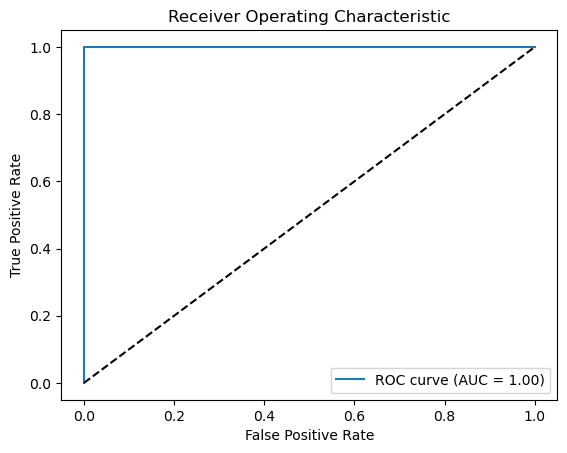

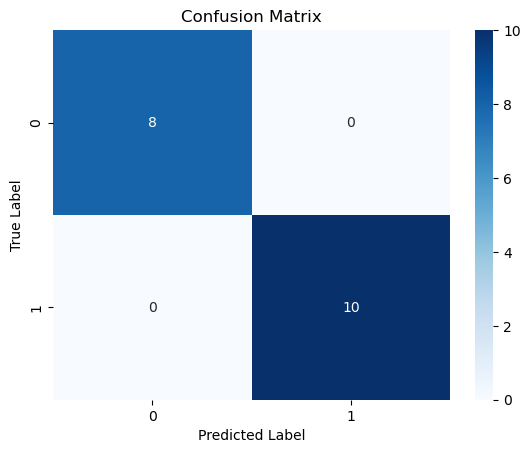

In [49]:
# Obtener las probabilidades de predicción
y_pred_prob_nn = best_model_nn.predict(X_test)

# Calcular la curva ROC y el AUC
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob_nn)
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

# Paso 6: Graficar la curva ROC
plt.plot(fpr_nn, tpr_nn, label='ROC curve (AUC = {:.2f})'.format(auc_nn))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Aplicar umbral a las probabilidades para obtener predicciones discretas
umbral = 0.5
y_pred_discreto_nn = np.where(y_pred_prob_nn >= umbral, 1, 0)


cm_nn = confusion_matrix(y_test, y_pred_discreto_nn)

# Visualize confusion matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### AdaBoost (Adaptative Boosting):

In [50]:
# Create the base estimator
base_estimator = DecisionTreeClassifier()

# Create the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define the parameter grid for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 1.0]  
}


# Perform grid search for AdaBoost
grid_search_ab = GridSearchCV(ada_boost, param_grid_ab, cv=3)
grid_search_ab.fit(X_train, y_train)

# Get the best AdaBoost model and its performance
best_ada_boost = grid_search_ab.best_estimator_
best_params_ab = grid_search_ab.best_params_
best_score_ab = grid_search_ab.best_score_

# Train the best AdaBoost model with all data
best_ada_boost.fit(X_train, y_train)

# Evaluate the best AdaBoost model
test_accuracy_ab = best_ada_boost.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy_ab*100:.2f}%')


Test Accuracy: 88.89%


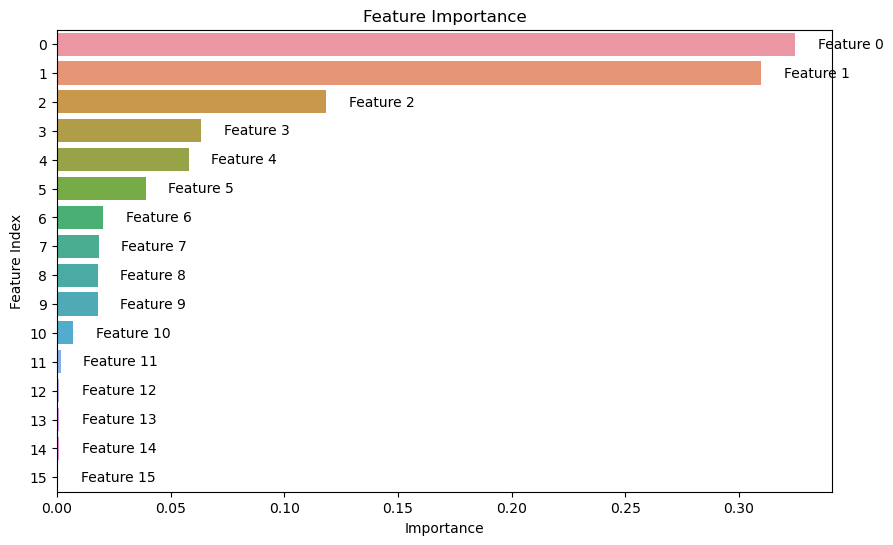

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from the best AdaBoost model
feature_importances_ab = best_ada_boost.feature_importances_

# Create an array of numerical indices for the features
feature_indices_ab = np.arange(len(feature_importances_ab))

# Sort the feature importances and indices in descending order
sorted_indices_ab = np.argsort(feature_importances_ab)[::-1]
sorted_importances_ab = feature_importances_ab[sorted_indices_ab]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_ab, y=feature_indices_ab, orient='h')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Index')

# Add the feature indices as text labels on the bars
for i, v in enumerate(sorted_importances_ab):
    plt.text(v + 0.01, i, f'Feature {i}', va='center')

plt.show()


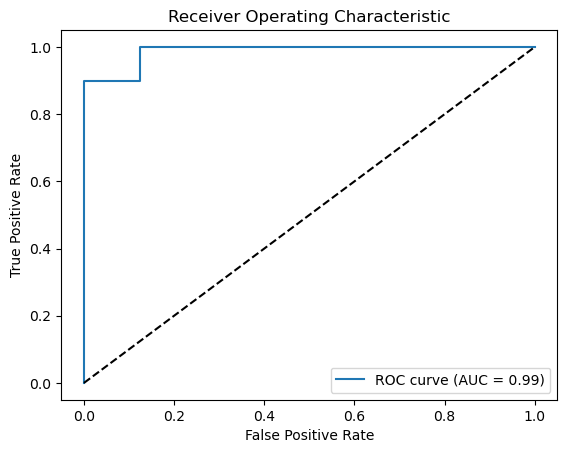

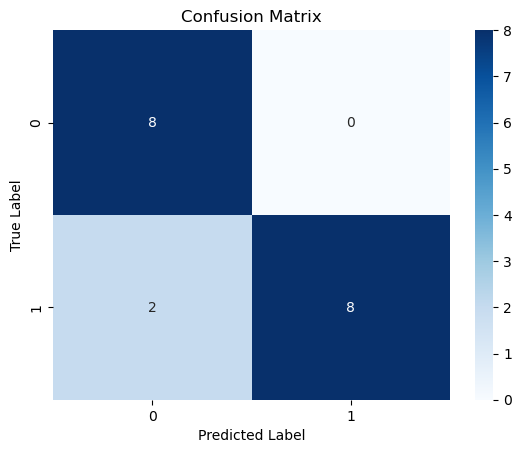

In [52]:
# Generate ROC curve and calculate AUC
y_pred_prob_ab = best_ada_boost.predict_proba(X_test)[:, 1]
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_pred_prob_ab)
auc_ab = roc_auc_score(y_test, y_pred_prob_ab)

# Plot ROC curve
plt.plot(fpr_ab, tpr_ab, label='ROC curve (AUC = {:.2f})'.format(auc_ab))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_ab = best_ada_boost.predict(X_test)
cm_ab = confusion_matrix(y_test, y_pred_ab)

# Visualize confusion matrix
sns.heatmap(cm_ab, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Gradient Boosting:

In [53]:
# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0],     
    'max_depth': [3, 4, 5]                 
}

# Perform grid search for Gradient Boosting
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)

# Get the best Gradient Boosting model and its performance
best_gradient_boosting = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Train the best Gradient Boosting model with all data
best_gradient_boosting.fit(X_train, y_train)

# Evaluate the best Gradient Boosting model
test_accuracy_gb = best_gradient_boosting.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy_gb*100:.2f}%')

Test Accuracy: 94.44%


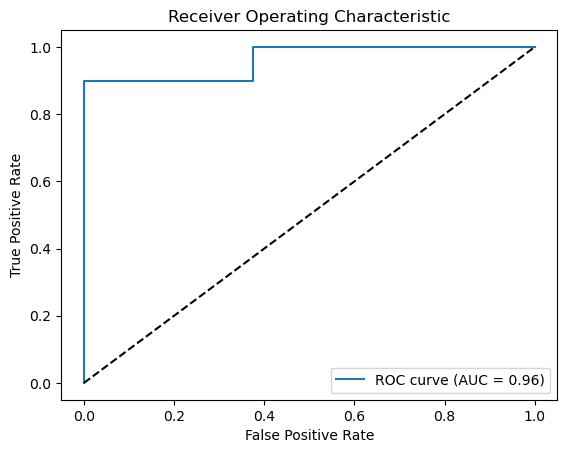

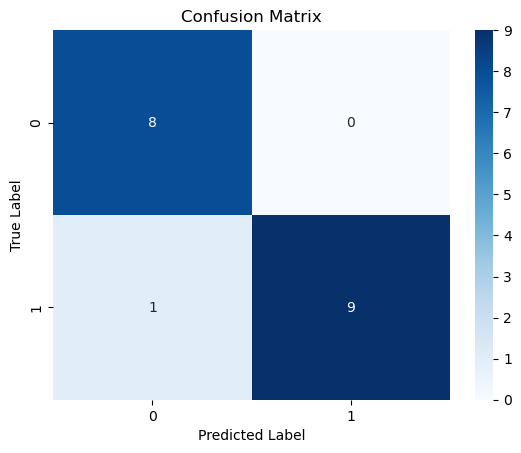

In [54]:
# Generate ROC curve and calculate AUC
y_pred_prob_gb = best_gradient_boosting.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Plot ROC curve
plt.plot(fpr_gb, tpr_gb, label='ROC curve (AUC = {:.2f})'.format(auc_gb))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_gb = best_gradient_boosting.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Visualize confusion matrix
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Shap Values NN

In [55]:
import shap

ImportError: Numba needs NumPy 1.24 or less

In [ ]:
# Inicializamoss SHAP explainer
explainer = shap.DeepExplainer(best_model_nn, X_train)
# Calculamos SHAP values
shap_values_nn = explainer.shap_values(X_test)

In [ ]:
df.keys()

In [ ]:
df_shap_nn = pd.DataFrame(shap_values_nn[0], columns = df.keys()[:-1])
df_shap_nn.head()

In [ ]:
mean_shap_nn = df_shap_nn.abs().mean().values
mean_shap_nn

In [ ]:
fig, ax = plt.subplots()

features = df.keys()[:-1]
y_pos = np.arange(len(features))

ax.barh(y_pos, mean_shap_nn, align='center')
ax.set_yticks(y_pos, labels=features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean(|SHAP|)')
ax.set_title('SHAP values, Neural Network')

plt.show()
